# 02 Hand writting digits classification and training

## Import necessary python libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils  
import numpy as np 

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Libraries are imported successfully
Tensorflow version:  1.13.1


## Download and load MNIT dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![image](notebook_image/004.png)

In [2]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data() 

  
# Translation of data  
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

## Features standardization and One-hot encoding

In digital circuits and machine learning, a one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).[1] A similar implementation in which all bits are '1' except one '0' is sometimes called one-cold.[2] In statistics, dummy variables represent a similar technique for representing categorical data

![image](notebook_image/005.png)

In [3]:
# Standardize feature data  
X_Train_keras_norm = X_Train_keras / 255  
X_Test_keras_norm = X_Test_keras /255  
      
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)



## Create a convolutional neural network

![image](notebook_image/006.jpeg)


In [4]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
      
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(5,5),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                  kernel_size=(5,5),  
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu'))  
      
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Add Dropout layer  
model.add(Dropout(0.25))  


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Create two fully connected layer

In [5]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               225920    
__________

## Start to train the CNN

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 50s - loss: 0.4966 - acc: 0.8439 - val_loss: 0.1001 - val_acc: 0.9696
Epoch 2/10
 - 22s - loss: 0.1336 - acc: 0.9599 - val_loss: 0.0645 - val_acc: 0.9804
Epoch 3/10
 - 22s - loss: 0.0958 - acc: 0.9720 - val_loss: 0.0513 - val_acc: 0.9839
Epoch 4/10
 - 23s - loss: 0.0790 - acc: 0.9764 - val_loss: 0.0459 - val_acc: 0.9862
Epoch 5/10
 - 22s - loss: 0.0665 - acc: 0.9794 - val_loss: 0.0436 - val_acc: 0.9866
Epoch 6/10
 - 22s - loss: 0.0586 - acc: 0.9823 - val_loss: 0.0376 - val_acc: 0.9889
Epoch 7/10
 - 22s - loss: 0.0523 - acc: 0.9845 - val_loss: 0.0412 - val_acc: 0.9881
Epoch 8/10
 - 22s - loss: 0.0498 - acc: 0.9847 - val_loss: 0.0360 - val_acc: 0.9898
Epoch 9/10
 - 22s - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0364 - val_acc: 0.9896
Epoch 10/10
 - 22s - loss: 0.0418 - acc: 0.9872 - val_loss: 0.0330 - val_acc: 0.9899


## Display Training History

Underfitting refers to a model that can neither model the training data nor generalize to new data.An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.


![image](notebook_image/007.png)

In [7]:
import os  
      
      
import matplotlib.pyplot as plt  
def plot_image(image): 
    #get current figure 
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
      
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
      
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  


  Using cached https://files.pythonhosted.org/packages/55/e6/c2d2b2703e7debc8b501caae0e6f7ead148fd0faa3c8131292a599930029/utils-1.0.1-py2.py3-none-any.whl


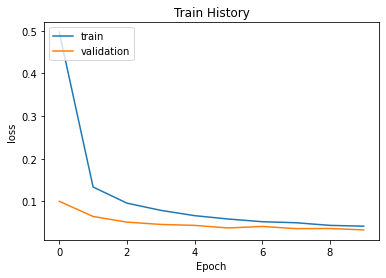

In [8]:
!pip3 install utils
from utils import *  

show_train_history(train_history, 'loss', 'val_loss')  

Test CNN

In [9]:
scores = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 6s 618us/sample - loss: 0.0247 - acc: 0.9913

[Info] Accuracy of testing data = 99.1%


[Info] Making prediction of X_Test4D_norm

[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



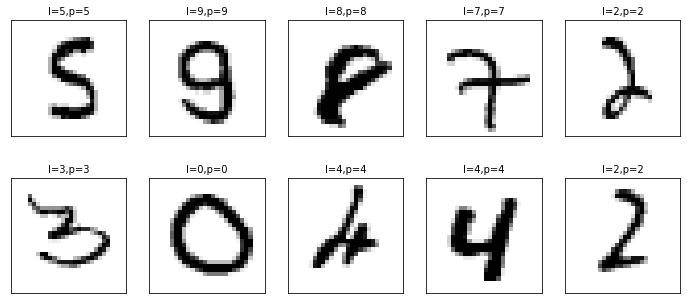

In [10]:
print("[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test_keras_norm)  # Making prediction and save result to prediction  
print()  
print("[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  